In [1]:
import numpy as np         
import os                  
import random 
import matplotlib.pyplot as plt
 
import cv2
TRAIN_DIR = 'C:/Users/Sada Siva/Desktop/datasets/train'
TEST_DIR = 'C:/Users/Sada Siva/Desktop/datasets/test'

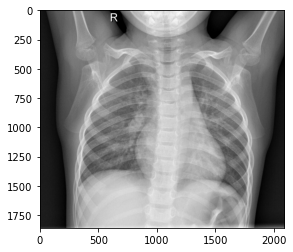

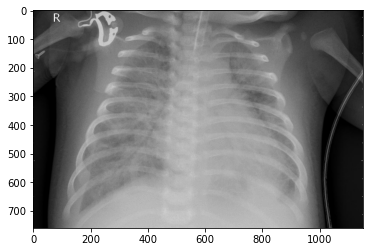

In [2]:
category=['NORMAL','PNEUMONIA']
for i in category:
    path=os.path.join(TRAIN_DIR,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
       

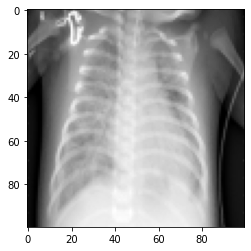

In [3]:
IMG_SIZE=100
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(new_array,cmap='gray')
plt.show()

In [4]:
training_data=[]
def create_training_data():
    for i in category:
        path=os.path.join(TRAIN_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
training_data

[[array([[21, 18, 30, ..., 96, 94, 95],
         [21, 18, 22, ..., 95, 93, 92],
         [21, 19, 16, ..., 94, 91, 90],
         ...,
         [29, 28, 27, ..., 23, 23, 24],
         [29, 28, 28, ..., 45, 46, 46],
         [39, 38, 38, ..., 91, 92, 93]], dtype=uint8),
  0],
 [array([[19, 30, 36, ..., 35, 29, 21],
         [20, 31, 37, ..., 32, 28, 20],
         [19, 31, 37, ..., 31, 28, 18],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
  0],
 [array([[ 0,  6, 25, ..., 40, 26,  1],
         [ 0,  1, 19, ..., 36, 19,  0],
         [ 0,  0, 11, ..., 33, 11,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  1],
         [ 0,  0,  0, ...,  0,  0,  1]], dtype=uint8),
  0],
 [array([[42, 51, 58, ..., 20, 20, 21],
         [39, 48, 55, ..., 20, 21, 21],
         [35, 45, 52, ..., 20, 20, 21],
         ...,
         [16, 15, 14, ..., 11, 11, 11],
 

In [6]:
len(training_data)

5216

In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
1
1
1
1
1


In [9]:
testing_data=[]
def create_testing_data():
    for i in category:
        path=os.path.join(TEST_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [10]:
testing_data

[[array([[31, 32, 31, ..., 31, 31, 30],
         [30, 31, 30, ..., 31, 31, 30],
         [31, 31, 30, ..., 32, 32, 30],
         ...,
         [28, 29, 28, ..., 34, 34, 33],
         [28, 29, 27, ..., 33, 33, 32],
         [28, 28, 28, ..., 33, 33, 32]], dtype=uint8),
  0],
 [array([[ 29,  28,  49, ..., 127, 121, 100],
         [ 29,  29,  42, ..., 128, 120,  98],
         [ 29,  30,  37, ..., 127, 118,  95],
         ...,
         [ 33,  41,  40, ...,  33,  33,  30],
         [ 33,  41,  41, ...,  33,  33,  30],
         [ 32,  41,  41, ...,  32,  33,  30]], dtype=uint8),
  0],
 [array([[36, 36, 34, ..., 30, 31, 29],
         [36, 36, 34, ..., 29, 29, 28],
         [34, 35, 34, ..., 27, 28, 27],
         ...,
         [28, 28, 27, ..., 33, 34, 33],
         [28, 28, 27, ..., 33, 35, 33],
         [27, 28, 27, ..., 34, 34, 33]], dtype=uint8),
  0],
 [array([[ 71,  76,  79, ..., 117, 133, 158],
         [ 76,  82,  83, ..., 118, 135, 159],
         [ 81,  82,  82, ..., 118, 136, 159],
 

In [11]:
len(testing_data)

624

In [12]:
import random
random.shuffle(testing_data)

In [13]:
for sample in testing_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
1
1
1


In [14]:
X=[]
y=[]

In [15]:
Xfor features,label in training_data:
    X.append(features)
    y.append(label)

In [16]:
len(X)

5216

In [17]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X.shape

(5216, 100, 100, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [19]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
X=X/255.0

In [22]:
X

array([[[[0.16470588],
         [0.14901961],
         [0.14117647],
         ...,
         [0.11764706],
         [0.11764706],
         [0.09019608]],

        [[0.16078431],
         [0.1372549 ],
         [0.1254902 ],
         ...,
         [0.11372549],
         [0.1254902 ],
         [0.13333333]],

        [[0.1372549 ],
         [0.12156863],
         [0.10196078],
         ...,
         [0.11372549],
         [0.11372549],
         [0.10196078]],

        ...,

        [[0.19215686],
         [0.18823529],
         [0.18431373],
         ...,
         [0.17254902],
         [0.17254902],
         [0.17254902]],

        [[0.19215686],
         [0.18823529],
         [0.18431373],
         ...,
         [0.17254902],
         [0.17254902],
         [0.17254902]],

        [[0.20392157],
         [0.18823529],
         [0.18431373],
         ...,
         [0.17254902],
         [0.17254902],
         [0.18431373]]],


       [[[0.09803922],
         [0.09019608],
         [0.09

In [23]:
y=np.array(y,dtype=np.uint8)
y

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [ ]:
model.fit(X,y,validation_split=0.3,epochs=10)

Epoch 1/10
 59/115 [==============>...............] - ETA: 24s - loss: 0.5132 - accuracy: 0.7678

In [ ]:
def prepare(filepath):
    img_size=100
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size),interpolation=cv2.INTER_AREA)
    return np.array(new_array).reshape(-1,img_size,img_size,1)

In [39]:
a=prepare('NORMAL.jpg')
a=a/255
a

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [40]:
img_array

array([[19, 19, 18, ...,  1,  0,  0],
       [19, 19, 18, ...,  1,  0,  0],
       [19, 19, 18, ...,  1,  0,  0],
       ...,
       [10, 10, 10, ..., 15, 15, 15],
       [10, 10, 10, ..., 15, 15, 15],
       [10, 10, 10, ..., 15, 15, 15]], dtype=uint8)

In [41]:
new_array

array([[21, 29, 35, ..., 21, 12,  3],
       [23, 31, 39, ..., 20, 14,  5],
       [23, 35, 41, ..., 23, 15,  5],
       ...,
       [10,  8,  4, ..., 15, 16, 16],
       [10,  8,  5, ..., 15, 15, 15],
       [10,  9,  5, ..., 15, 15, 15]], dtype=uint8)